### Imports and "global variables" definition

In [1]:
import os
import json
import import_ipynb

import numpy as np
import pandas as pd
import collections as c
import plotly.express as px
import matplotlib.pyplot as plt

import UserBuilder

from pathlib import Path
from pprint import pprint

ans_dict = {"A":0, "B":1, "C":2, "D":3, "E":4}
graphs_path = "./graphs/"

os.makedirs(graphs_path + "all_freqs", exist_ok=True)
os.makedirs(graphs_path + "attentive_freqs", exist_ok=True)

importing Jupyter notebook from UserBuilder.ipynb
importing Jupyter notebook from SurveyUser.ipynb


### Functions definition
This function gets the frequency of labels in an answer for all the answers and the "correct answer" rate.<br>
It takes a series of users and return a tuple of frequencies of answers and correct rates per answer.

In [2]:
def freqsNrates(userfactory, userseries):
    answers_freqs = []
    answers_rates = []
    #for index in range(len(users_factory.users_built[0].))
    for index in (userseries[0].questions_dict).keys():
        freqs, rates = userfactory.answers_freqs(index, userseries)
        answers_freqs.append(freqs)
        answers_rates.append(rates)
    return answers_freqs, answers_rates

This function plots the graph of the answers frequencies for a given question. <br>
If someone gave the correct answer, then it's shown in yellow.

In [3]:
def frequencies_plot(question_num, answers_freqs, path):
    correct = UserBuilder.correct_answers[question_num + 1]
    w = c.Counter(answers_freqs[question_num])
    plt.title("Question {}".format(question_num + 1))
    barlist = plt.bar(w.keys(), w.values())
    ## Calculate 
    if question_num+1 != 17:
        print([x for x in ans_dict.keys()][ans_dict[correct]])
        print(answers_freqs[question_num])
        if ([x for x in ans_dict.keys()][ans_dict[correct]] in answers_freqs[question_num]):
            try:
                barlist[ans_dict[correct]].set_color("y")
            except:
                pass
    title = "Question " + str(question_num + 1) + ".png"
    plt.savefig(fname=path + title)
    plt.show()

### Json dataset opening
Also checking the length of the survey elements

In [4]:
with open('rawdata.json', 'r') as f:
    survey = json.load(f)

In [5]:
len(survey)

132

In [6]:
survey[0]["surveytype"]

'B'

### Instantiating the a UserBuilder object
Making it build a series of users and returns itself at each iteration.<br>
If for some reason a survey is broken, it eliminates it and goes on.

In [7]:
users_factory = UserBuilder.UserBuilder()

In [8]:
for index in range(len(survey)):
    try:
        users_factory, _ = users_factory.survey_parser(survey[index])
    except:
        print(index)
        pass

21
34
50
57
63
65
68
78
91
96
124


### Instantiating an object that is basically the list of users built by the factory
From there, it filters the attentive users that answered correctly at the attention check.<br>

In [9]:
userseries = users_factory.users_built

In [10]:
userseries_attentive = ([x for x in (filter(lambda user: not(user.distracted), userseries))])

In [11]:
#filtered_users = UserBuilder.UserBuilder()

### Comparison of flist of attentive users and list of all users

In [12]:
all_freqs, all_rates = freqsNrates(UserBuilder.UserBuilder(), userseries)
attentive_freqs, attentive_rates = freqsNrates(UserBuilder.UserBuilder(), userseries_attentive)
all_freqs == attentive_freqs

False

#### Percentage of right answers in attentive users and all users

In [13]:
np.mean(all_rates)

0.32182790471560524

In [14]:
np.mean(attentive_rates)

0.3599439775910364

### Barplots for the answers frequecies for each answer
If the someone got the right answer, then it's shown in a different colour

D
Counter({'D': 38, 'C': 31, 'B': 27, 'A': 25})


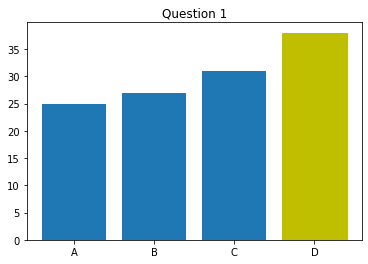

C
Counter({'B': 61, 'C': 39, 'D': 12, 'A': 9})


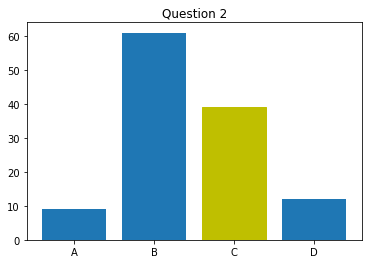

B
Counter({'C': 52, 'B': 27, 'A': 21, 'D': 21})


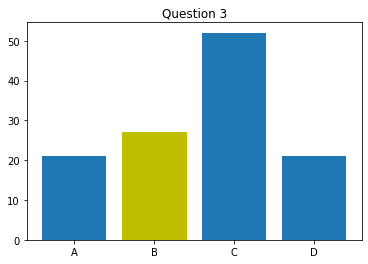

D
Counter({'A': 64, 'B': 20, 'C': 19, 'D': 18})


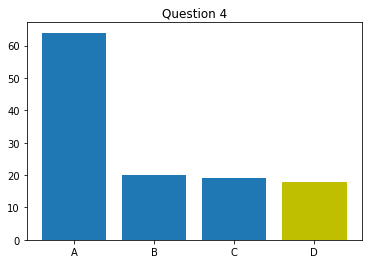

B
Counter({'B': 67, 'C': 23, 'A': 21, 'D': 10})


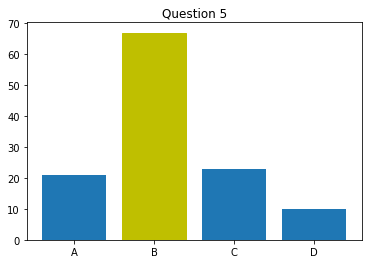

E
Counter({'E': 47, 'D': 30, 'B': 23, 'C': 14, 'A': 7})


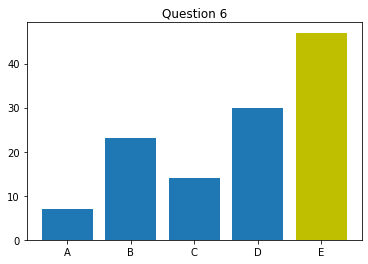

C
Counter({'C': 77, 'A': 42, 'B': 1, 'D': 1})


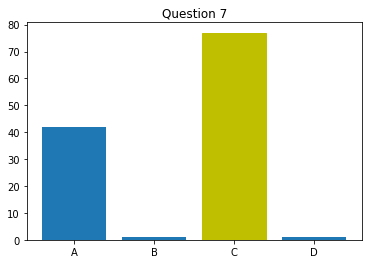

D
Counter({'A': 47, 'C': 34, 'D': 22, 'B': 18})


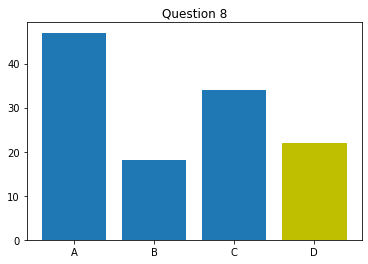

B
Counter({'A': 44, 'B': 44, 'D': 24, 'C': 9})


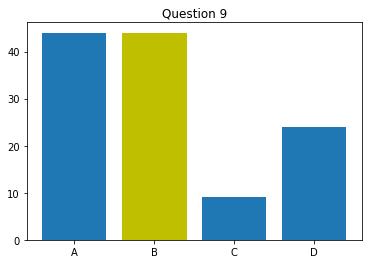

C
Counter({'C': 50, 'B': 31, 'A': 24, 'D': 16})


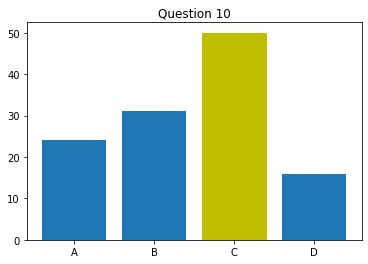

A
Counter({'D': 43, 'A': 31, 'B': 26, 'C': 21})


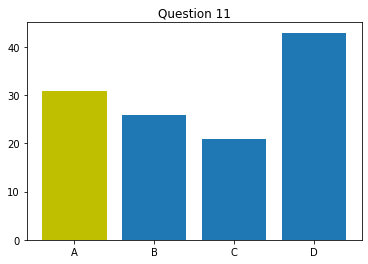

C
Counter({'C': 47, 'A': 36, 'B': 20, 'D': 18})


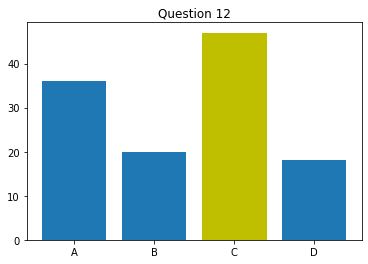

C
Counter({'B': 38, 'C': 33, 'A': 30, 'D': 20})


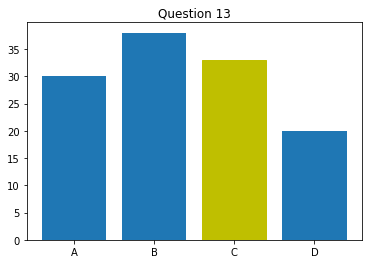

C
Counter({'C': 36, 'D': 35, 'B': 28, 'A': 22})


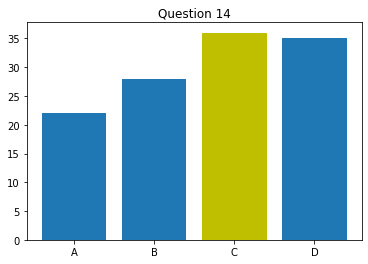

D
Counter({'D': 39, 'A': 37, 'B': 27, 'C': 18})


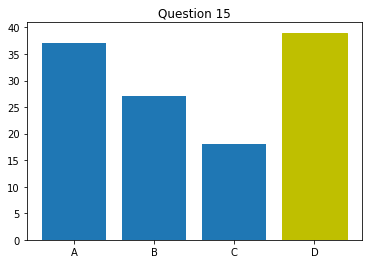

D
Counter({'D': 47, 'C': 27, 'A': 24, 'B': 23})


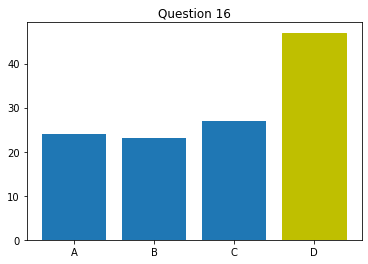

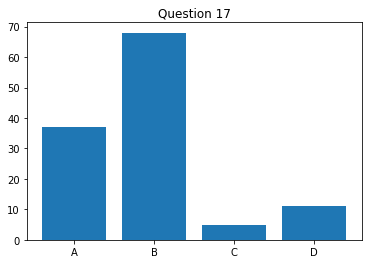

In [15]:
for i in range(17):
    frequencies_plot(i, all_freqs, path=graphs_path+"all_freqs/")

D
Counter({'D': 26, 'C': 22, 'A': 18, 'B': 18})


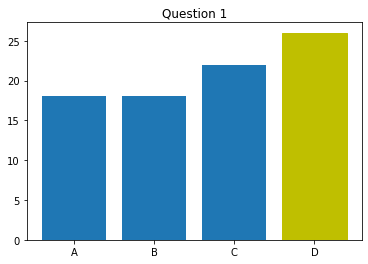

C
Counter({'B': 46, 'C': 26, 'D': 7, 'A': 5})


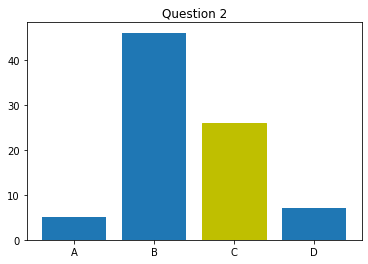

B
Counter({'C': 33, 'B': 20, 'D': 17, 'A': 14})


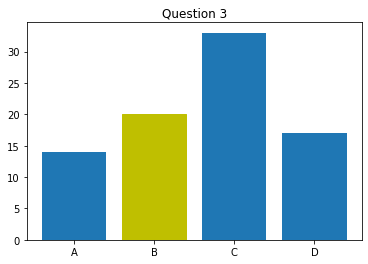

D
Counter({'A': 52, 'D': 14, 'B': 9, 'C': 9})


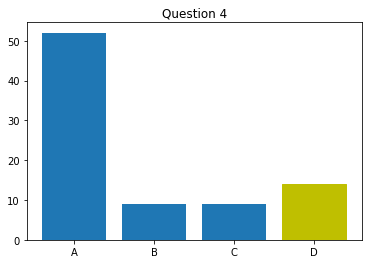

B
Counter({'B': 52, 'A': 14, 'C': 12, 'D': 6})


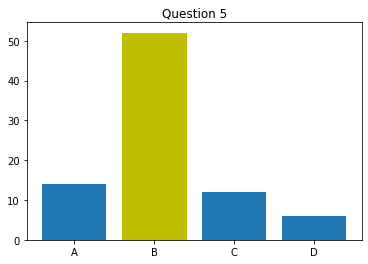

E
Counter({'E': 37, 'D': 21, 'B': 15, 'C': 8, 'A': 3})


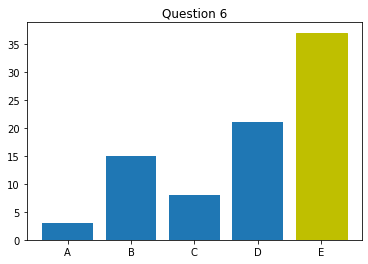

C
Counter({'C': 75, 'A': 9})


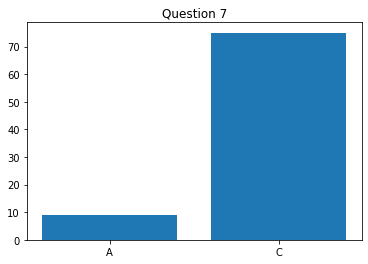

D
Counter({'A': 34, 'C': 23, 'D': 17, 'B': 10})


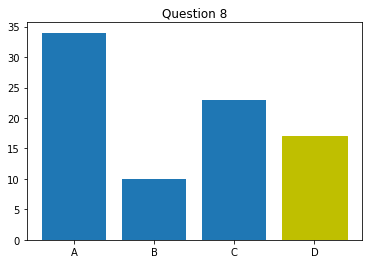

B
Counter({'B': 38, 'A': 28, 'D': 14, 'C': 4})


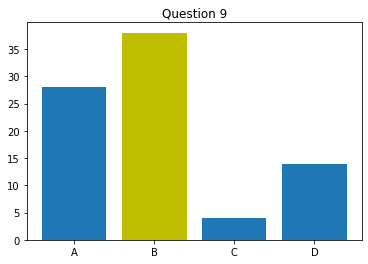

C
Counter({'C': 37, 'B': 23, 'A': 14, 'D': 10})


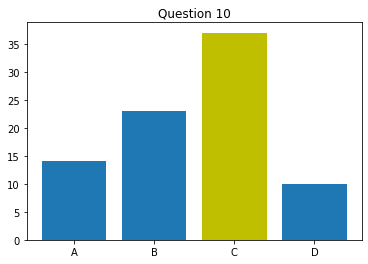

A
Counter({'A': 27, 'D': 26, 'B': 17, 'C': 14})


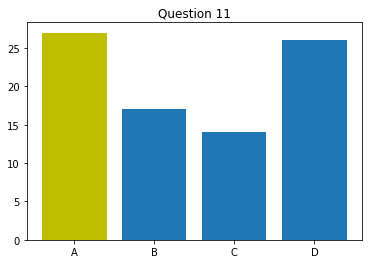

C
Counter({'C': 34, 'A': 26, 'B': 13, 'D': 11})


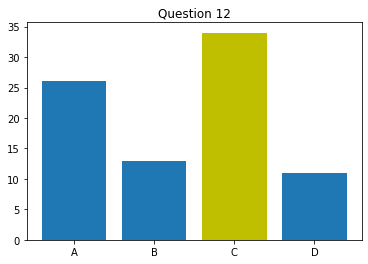

C
Counter({'B': 25, 'C': 21, 'A': 20, 'D': 18})


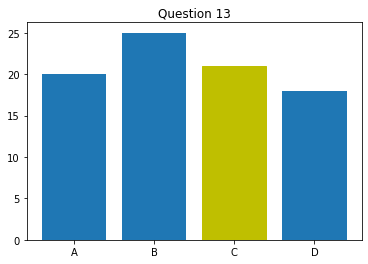

C
Counter({'C': 28, 'D': 23, 'B': 22, 'A': 11})


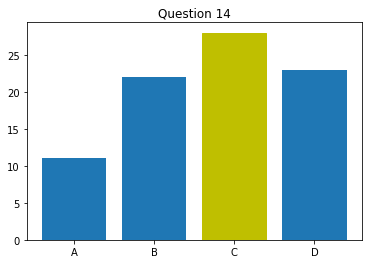

D
Counter({'D': 29, 'A': 23, 'B': 21, 'C': 11})


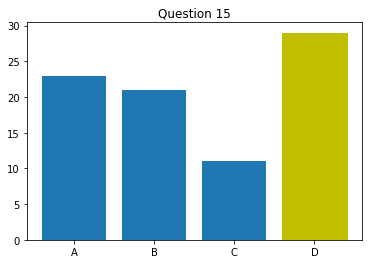

D
Counter({'D': 33, 'A': 21, 'C': 17, 'B': 13})


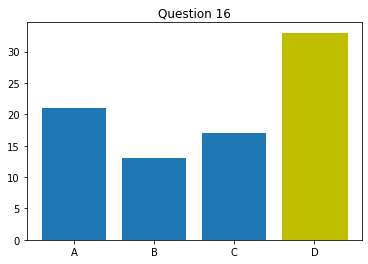

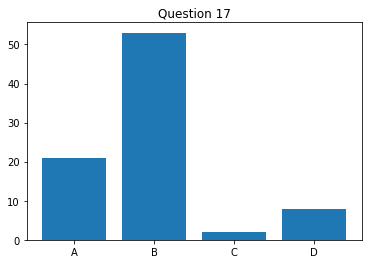

In [16]:
for i in range(17):
    frequencies_plot(i, attentive_freqs, path=graphs_path+"attentive_freqs/")

### Calculate average completion time for each user and plot

In [17]:
average_times = [user.time_completion() for user in userseries_attentive]

In [18]:
userseries_attentive[0].questions_dict

{1: [('B', '1606048484321')],
 2: [('B', '1606048541813')],
 3: [('C', '1606048664491')],
 4: [('A', '1606048710621')],
 5: [('C', '1606048846965'),
  ('B', '1606048856527'),
  ('C', '1606048876623'),
  ('A', '1606048880930')],
 6: [('E', '1606049081447')],
 7: [('C', '1606049239163')],
 8: [('D', '1606049380437')],
 9: [('B', '1606049493035')],
 10: [('C', '1606049542533')],
 11: [('B', '1606049659048')],
 12: [('C', '1606049878308')],
 13: [('D', '1606050004177')],
 14: [('C', '1606050129288')],
 15: [('D', '1606050261523')],
 16: [('D', '1606050291235')],
 17: [('B', '1606050303577')]}

(array([63., 15.,  4.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  1.8385  ,  18.348295,  34.85809 ,  51.367885,  67.87768 ,
         84.387475, 100.89727 , 117.407065, 133.91686 , 150.426655,
        166.93645 ]),
 <a list of 10 Patch objects>)

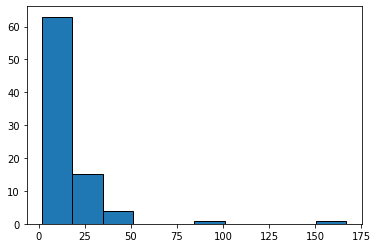

In [19]:
plt.hist(average_times, histtype="bar", ec="black")

In [20]:
np.mean(np.asarray(average_times))

16.318951984126983

### Readability preferences

In [21]:
#preferences = ([int(x) for x in UserBuilder.UserBuilder().prefs_freqs(1, userseries_attentive)])
pref_questions = [(UserBuilder.UserBuilder().prefs_freqs(index, userseries_attentive)) if index != 7 else [] for index in range(1,17)]

In [22]:
averaged_preferences = [np.mean(np.asarray([int(x) for x in pref])) for pref in pref_questions]

/home/tore/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tore/venv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [23]:
({i+1:j for i,j in enumerate(averaged_preferences)})

{1: 3.011904761904762,
 2: 3.392857142857143,
 3: 3.4285714285714284,
 4: 3.630952380952381,
 5: 3.3333333333333335,
 6: 3.1547619047619047,
 7: nan,
 8: 3.2142857142857144,
 9: 3.369047619047619,
 10: 3.4285714285714284,
 11: 3.369047619047619,
 12: 3.4404761904761907,
 13: 3.2142857142857144,
 14: 3.357142857142857,
 15: 3.2738095238095237,
 16: 3.4047619047619047}

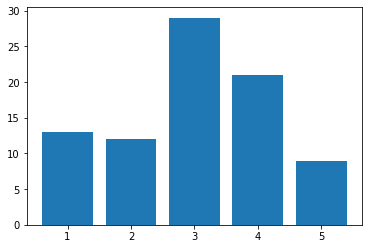

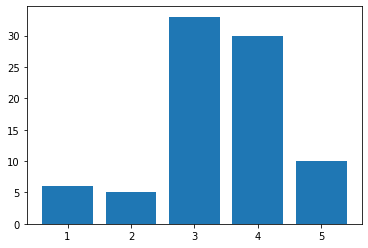

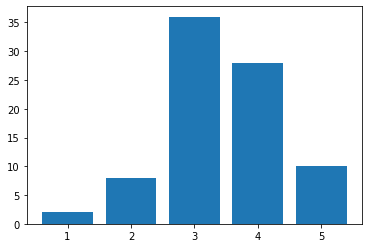

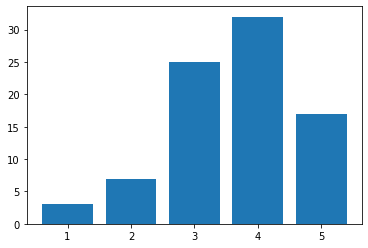

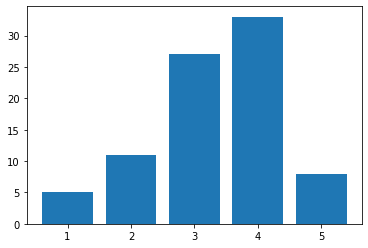

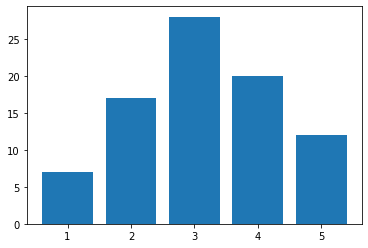

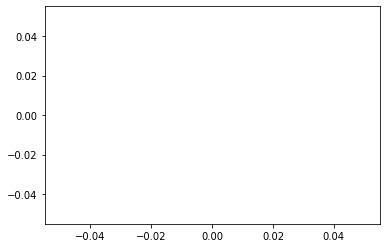

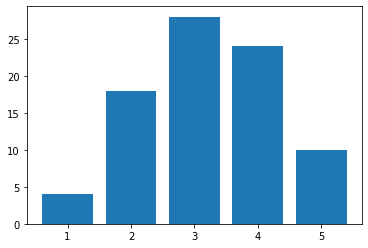

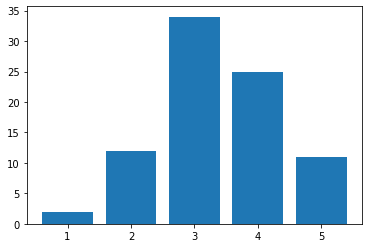

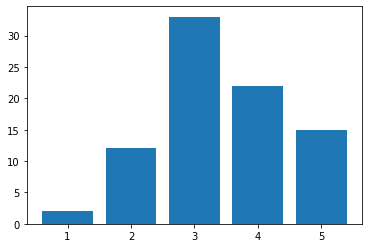

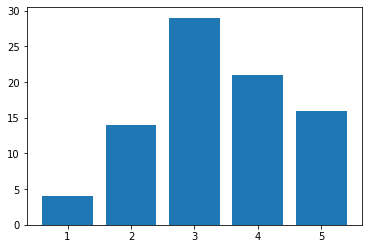

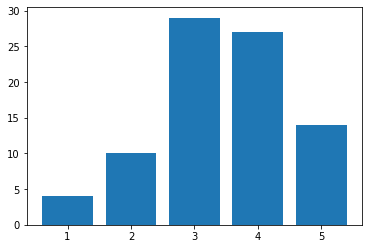

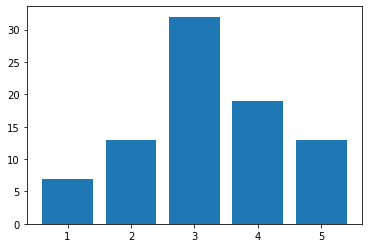

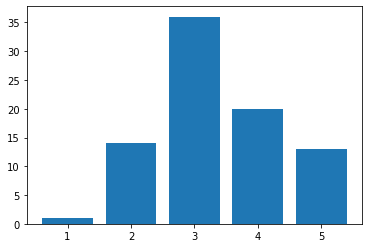

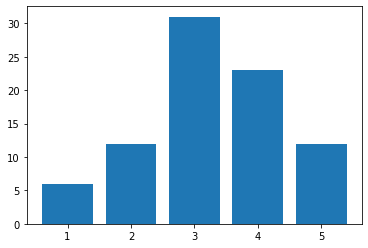

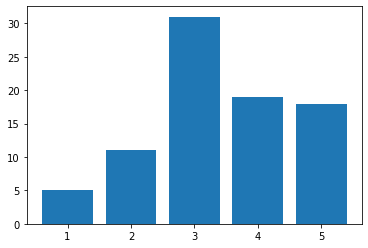

In [24]:
for i in pref_questions:
    w = c.Counter(i)
    plt.bar(w.keys(), w.values())
    plt.show()

In [27]:
c.Counter([user.survey_type for user in userseries_attentive])

Counter({'B': 42, 'C': 20, 'A': 22})

In [26]:
expertise = [float(user.info["dev_exp"]) for user in userseries_attentive]
len(expertise), len(average_times)

(84, 84)

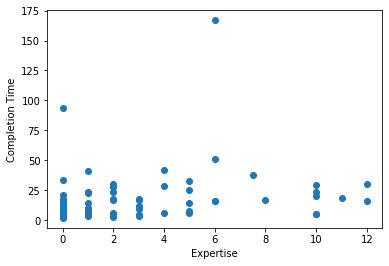

In [28]:
plt.xlabel("Expertise")
plt.ylabel("Completion Time")
plt.scatter(expertise, average_times)
plt.show()

In [29]:
max(userseries_attentive, key=lambda x: float(x.info["dev_exp"])).info

{'dev_exp': '12',
 'corrected_vision': 'Corrected Vision',
 'color_blind': 'No',
 'language': 'Mandarin',
 'usage': ['Laptop'],
 'gender': 'Prefer Not To Say',
 'agree': True}

### Repeat all the code but by separating for Survey Type Users

In [28]:
survey_types = ["A", "B", "C"]

In [32]:
users_by_type = [list(filter(lambda x: x.survey_type == surtype, userseries_attentive)) for surtype in survey_types]
#[user in userseries_attentive if user.survey_type == surtype] for surtype in survey_types]

In [34]:
users_A, users_B, users_C = users_by_type[0], users_by_type[1], users_by_type[2]

### Scrap area

In [25]:
question = 1
for item in survey[3]["userresponse"]:
    print("Question: ", item.keys())
    #.keys()

Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['qu

In [26]:
{key: value for key,value in survey[0]["userdata"]["personal"].items() if key != "email"}

{'dev_exp': '2',
 'corrected_vision': 'Normal Vision',
 'color_blind': 'No',
 'language': 'Chinese',
 'usage': ['Laptop'],
 'gender': 'Female',
 'agree': True}